## Trajectory Inference // PAGA 

Author: Lieke L van de Haar (18112020)

__PAGA__

Wolf, F.A., Hamey, F.K., Plass, M. et al. PAGA: graph abstraction reconciles clustering with trajectory inference through a topology preserving map of single cells. Genome Biol 20, 59 (2019). https://doi.org/10.1186/s13059-019-1663-x

For detailed information on PAGA: https://github.com/theislab/paga 

In [18]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as pl
from matplotlib import rcParams
from scipy.sparse import csr_matrix

#settings
sc.settings.verbosity = 3
sc.logging.print_versions()
scv.logging.print_versions()
sc.settings.figdir = "../../figures/embryo_Hb/Seurat"
scv.settings.figdir = "../../figures/embryo_Hb/Seurat"
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.4 umap==0.3.10 numpy==1.19.2 scipy==1.4.1 pandas==1.0.1 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.0 louvain==0.6.1
scvelo==0.1.25  scanpy==1.4.6  anndata==0.7.4  loompy==3.0.6  numpy==1.19.2  scipy==1.4.1  matplotlib==3.3.2  sklearn==0.22.1  pandas==1.0.1  

## Import the adata 

In [3]:
adata = sc.read('../../data/output/embryo_Hb/Mar2020_embryo_Hb_Pou4f1_louvain_seurat.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 2773 × 2292
    obs: 'n_genes', 'plate', 'platebatch', 'stage', 'well_no', 'ERCC_genes', 'n_total_counts', 'percent_mito', 'n_counts', 'percent_ribo', 'percent_protein_coding', 'percent_lincRNA', 'sum_lincRNA', 'percent_antisense', 'sum_antisense', 'percent_miRNA', 'sum_miRNA', 'percent_bidirectional_promoter_lncRNA', 'sum_bidirectional_promoter_lncRNA', 'percent_snoRNA', 'n_counts_norm', 'louvain', 'velocity_self_transition', 'lineages', 'root_cells', 'end_points', 'velocity_pseudotime', '__is_in_cluster__', 'trajectory_wishbone', 'branch_wishbone', 'dpt_pseudotime', 'distance'
    var: 'ENS_names', 'geneid', 'feature', 'chr', 'fullname', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'branch1_wishbone', 'branch2_wishbone', 'dendrogram_louvain', 'dendrogram_stage', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', '

In [6]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:21)


In [7]:
sc.pl.draw_graph(adata, color='louvain', legend_loc='on data', save="_PAGA_FA")

In [ ]:
sc.tl.paga(adata, groups='louvain')

In [9]:
sc.pl.paga(adata, threshold=0.03, save="_0.03") ## discussion: set this threshold differently

--> added 'pos', the PAGA positions (adata.uns['paga'])


In [10]:
sc.tl.draw_graph(adata, init_pos='paga')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:20)


In [66]:
sc.pl.paga_compare(
    adata, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save="_compare")

--> added 'pos', the PAGA positions (adata.uns['paga'])


Define cluster 12 to be the root 

In [11]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain']  == '12')[0] ## discussion: set this starting point differently

In [12]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


In [13]:
sc.pl.draw_graph(adata, color=['louvain', 'dpt_pseudotime'],cmap='magma', legend_loc='on data', save= "pseudotime")

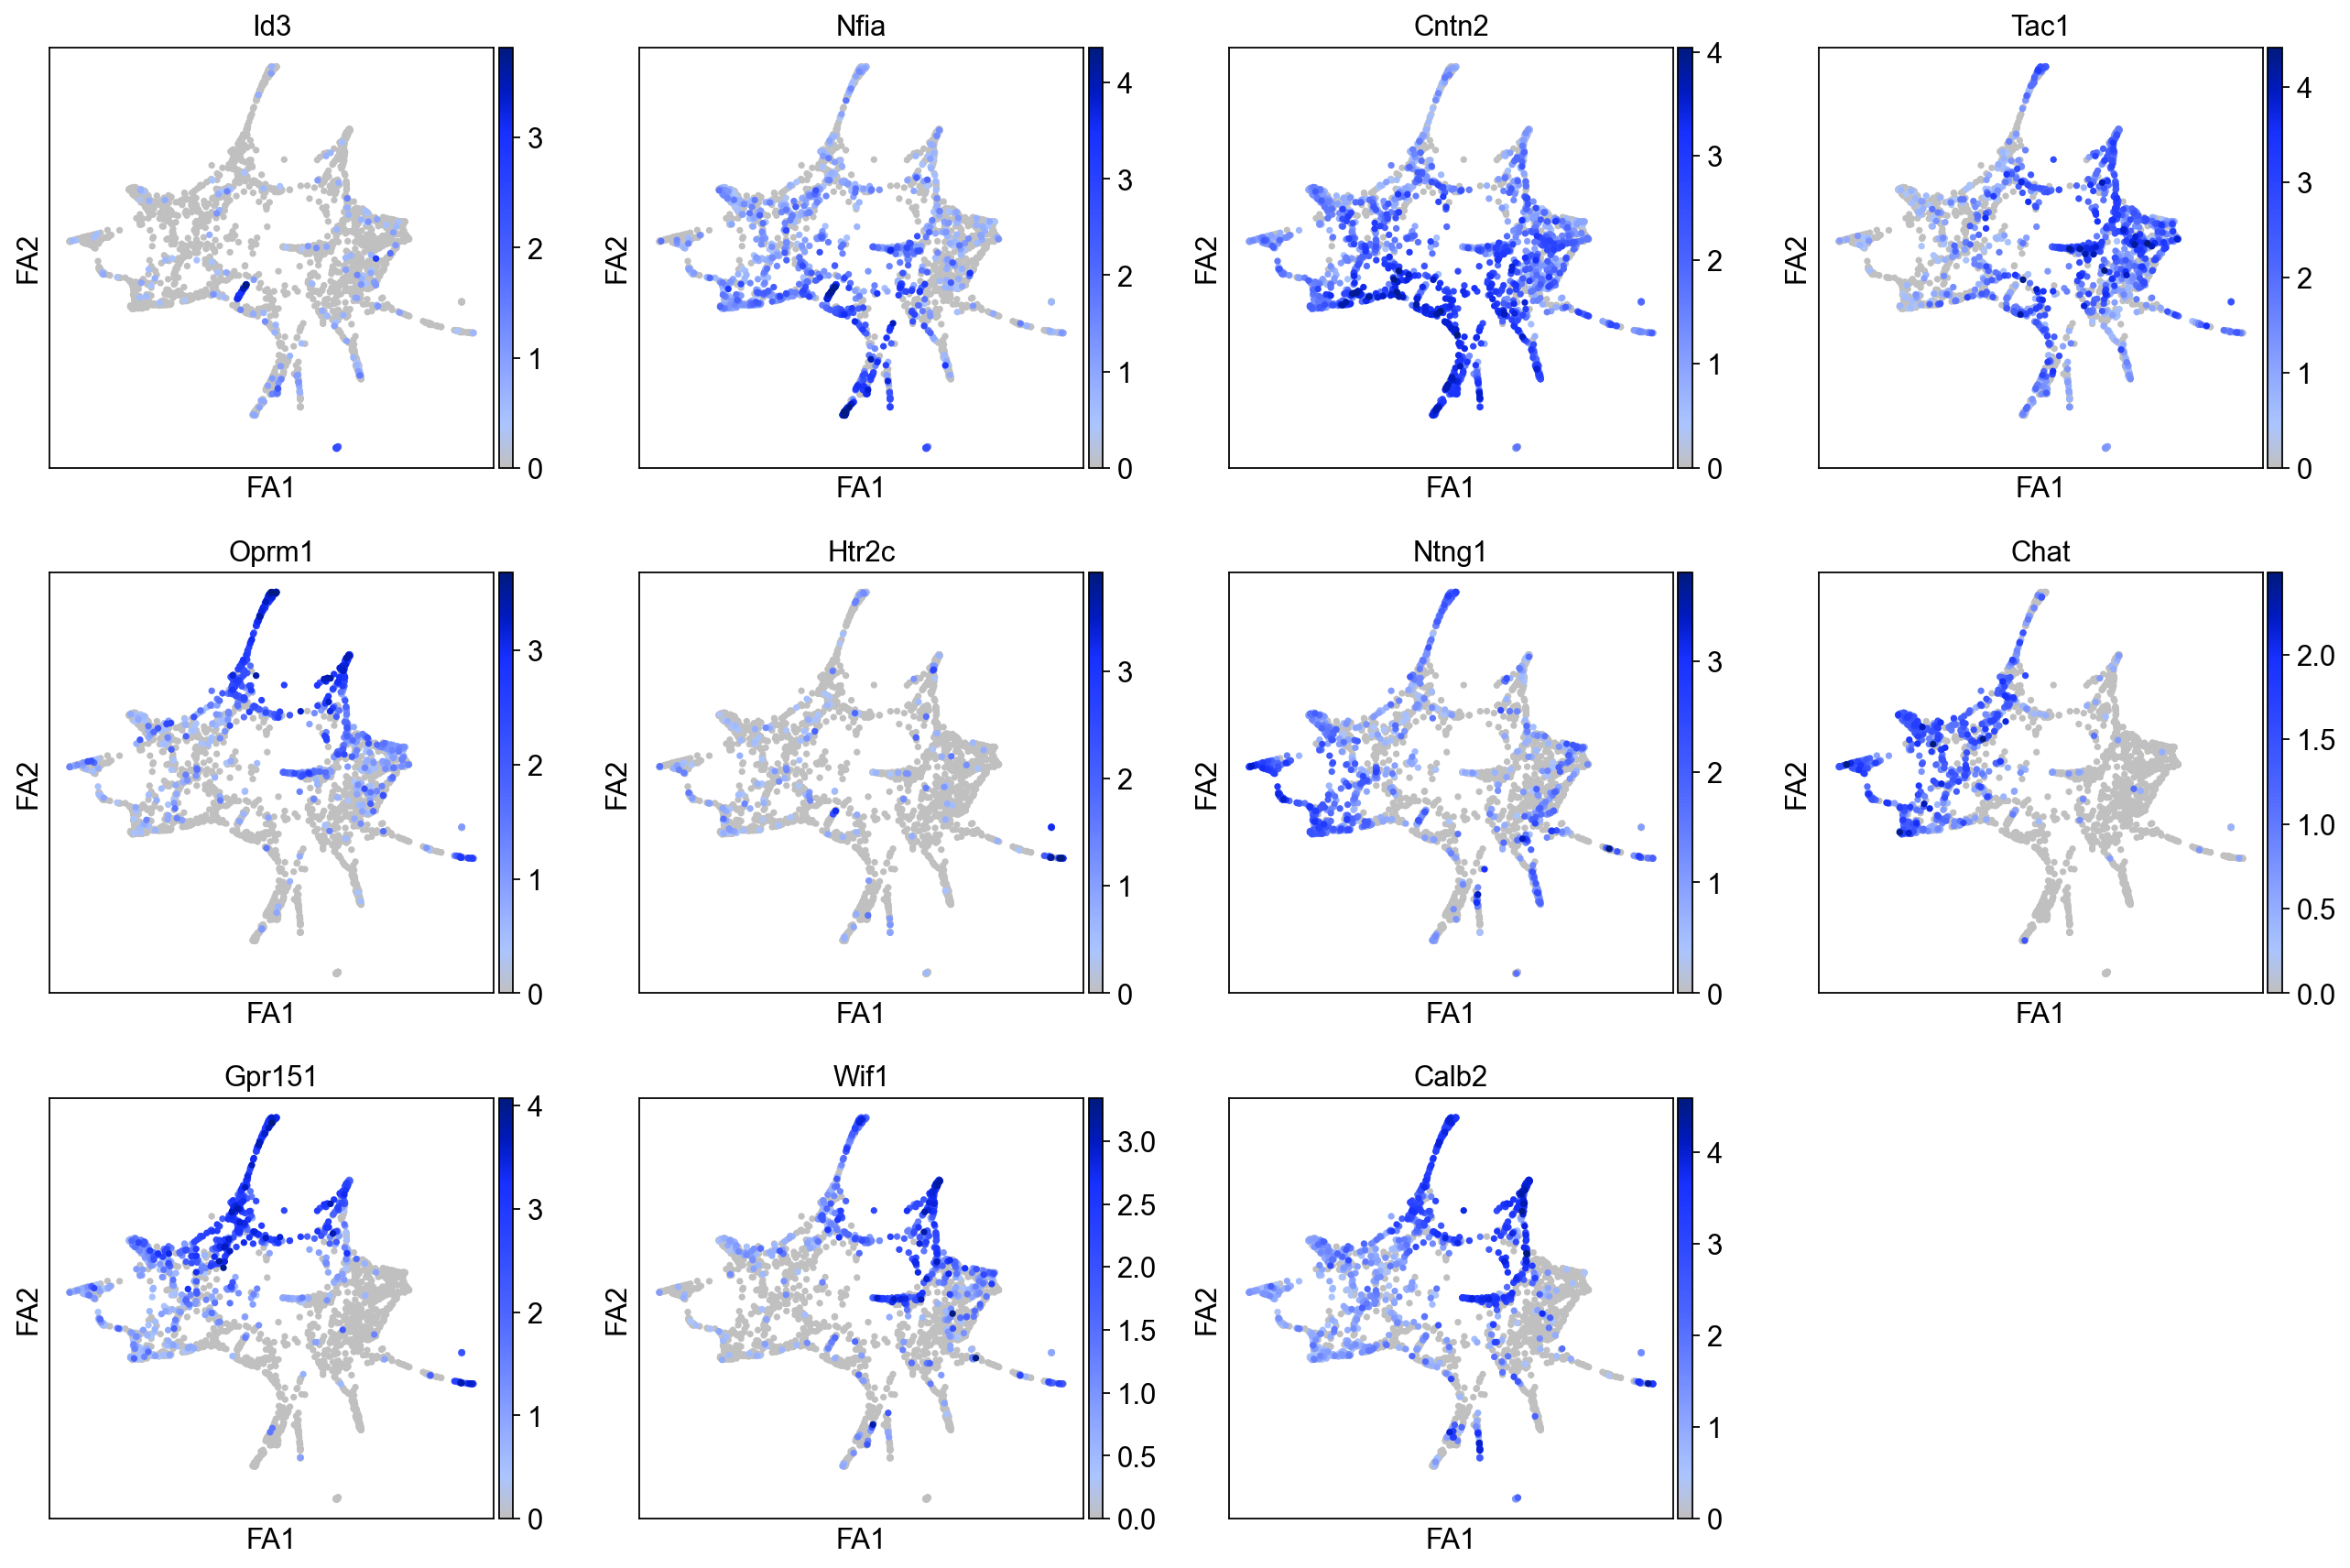

In [22]:
sc.pl.draw_graph(adata, color=['Id3', 'Nfia','Cntn2', 'Tac1', 'Oprm1', 'Htr2c', 'Ntng1', 'Chat', 'Gpr151', 'Wif1', 'Calb2'], 
                 legend_loc='on data', cmap= c_cont_blue)

In [14]:
paths = [('Cl9', [12, 2, 9]),
         ('Cl7', [12, 5, 7]),
         ('Cl10', [12, 0, 10]),
         ('Cl11', [12, 1, 11])]

In [15]:
adata.obs['distance'] = adata.obs['dpt_pseudotime']

In [16]:
marker_genes = ['Id3', 'Vim','Cntn2', 'Chat', 'Calb2','Cartpt', "Oprm1",'Tac1', 'Htr2c']

In [19]:
_, axs = pl.subplots(ncols=4, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.12})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, marker_genes,                         
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        color_maps_annotations={'distance': 'magma'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
pl.savefig('../../figures/embryo_Hb/Seurat/PAGA_heatmap_pseudotime.pdf') 
pl.show()

In [224]:
#adata.write('../../data/output/embryo_Hb/Mar2020_embryo_Hb_Pou4f1_PAGA_seurat.h5ad')